Based on http://www.scipy-lectures.org/advanced/image_processing/

In [17]:
import imageio

import matplotlib.pyplot as plt
import numpy as np

from scipy import misc

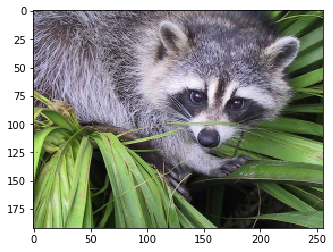

<class 'imageio.core.util.Image'>
(192, 256, 3)


In [8]:
f = imageio.imread('miniface.png')
plt.imshow(f)
plt.show()
print(type(f))
print(f.shape)

In [10]:
f.tofile("tiny.raw")
fr = np.fromfile("tiny.raw", dtype=np.uint8)
fr.shape = (192, 256, 3)
fr.shape

(192, 256, 3)

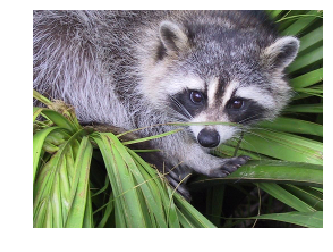

In [13]:
plt.imshow(fr)
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


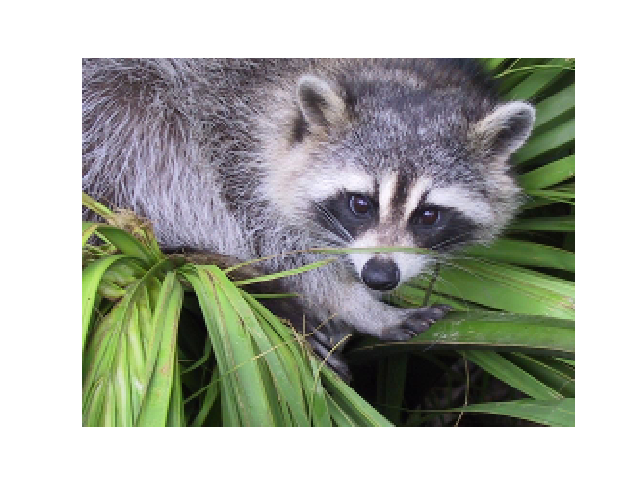

In [15]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
plt.axis("off")
plt.ion()

ax.imshow(fr)
fig.show()
fig.canvas.draw()

In [ ]:
face = misc.face(gray=True)

# Slicing
face[10:13, 20:23]

lx, ly = face.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4

# Masks
face[mask] = 0

# Fancy indexing
face[range(400), range(400)] = 255
plt.imshow(face)
plt.show()

In [126]:
def adjacents(ffr, i, j):
    values = []
    for k in range(i-1,i+2):
        if (k>=0 and k<ffr.shape[0]):
            for w in range(j-1,j+2):
                if ((w>=0 and w<ffr.shape[1]) and (k!=i or w!=j)):
                    values.append(ffr[k][w])
    return values

In [127]:
adjets = adjacents(fr,0,1)

In [139]:
def evaluate_next(original,adjacents,rules):
    # R G B
    # TODO: include rules
    totals = np.array([0,0,0], dtype='int64')
    final = np.array([0,0,0], dtype='int64')
    for adj in adjacents:
        totals = totals + adj
    #Blue
    bmed=totals[2]/len(adjacents)
    if original[2]<bmed:
        final[2]=bmed #TODO: change percentage of increase by counting number of adjacents with greater value
    else:
        final[2]=original[2]
    #Green
    glim = totals[2]-totals[1]
    ggrow = original[2]-original[1]
    if ggrow<0 or ggrow<glim:
        final[1]=original[1]+ggrow #TODO: check this values
        if ggrow>0:
            final[2]=final[2]-ggrow
    else:
        final[1]=original[1]
    #Red
    rlim = totals[1]-totals[0]
    rgrow = int(original[1])-int(original[0])
    rgrate = int(original[0])/2
    if rlim<rgrow :
        rgrow = rlim
    if rgrow<rgrate :
        rgrate = rgrow
    if original[2]<(int(original[0])/10):
        final[0] = int(original[0])/10
    else:
        final[0] = original[0]+rgrate #TODO: check this values 
    
    if rgrate>0: final[1] = final[1]- int(rgrate)/2
    else : final[2] = final[2] + int(rgrate)

    if final[0]>255: final[0]=255
    if final[2]>255: final[2]=255
    if final[1]>255: final[1]=255
    return final
    

In [140]:
evaluate_next(fr[0][1],adjets,[])

array([ 19, 121, 122], dtype=int64)

In [141]:
def iterate (ffr, rules):
    original_ffr = np.copy(ffr)
    
    for i in range(0,ffr.shape[0]):
        for j in range(0,ffr.shape[1]):
            ffr[i][j] = evaluate_next(original_ffr[i][j],adjacents(original_ffr,i,j),rules)

In [142]:
RULES = []

<IPython.core.display.Javascript object>


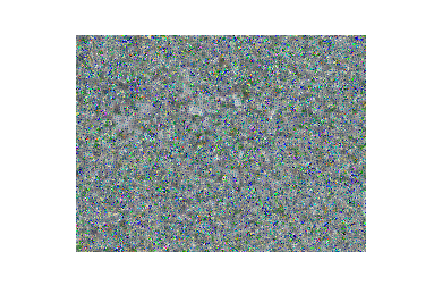

C:\Users\luis.quintanabolano\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
C:\Users\luis.quintanabolano\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars


In [164]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
plt.axis("off")
plt.ion()

for z in range(0,10):
    iterate(fr,RULES)
    ax.clear
    ax.imshow(fr)
    fig.show()
    fig.canvas.draw()

<IPython.core.display.Javascript object>


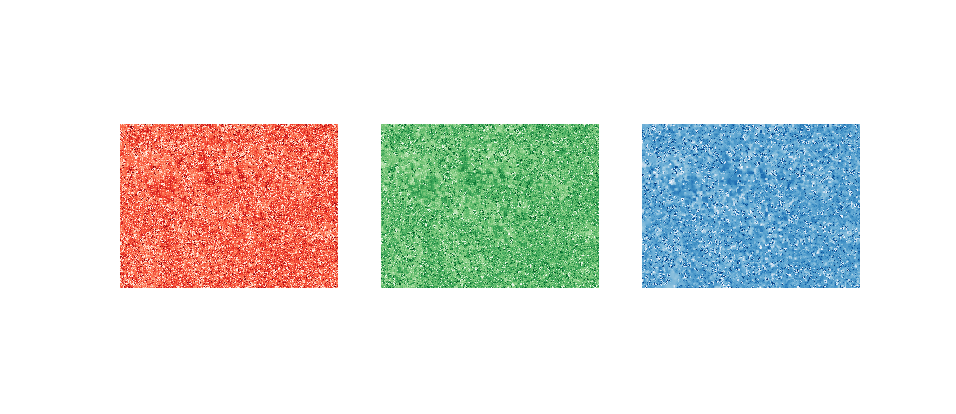

In [163]:
%matplotlib notebook
fig2 = plt.figure()
ax1 = fig2.add_subplot(131)
ax2 = fig2.add_subplot(132, sharex=ax1, sharey=ax1)
ax3 = fig2.add_subplot(133, sharex=ax1, sharey=ax1)

ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax1.imshow(fr[:,:,0],cmap = "Reds")
ax2.imshow(fr[:,:,1],cmap = "Greens")
ax3.imshow(fr[:,:,2],cmap = "Blues")
fig2.show()
fig2.canvas.draw()

In [166]:
def play(fr, iters):
    %matplotlib notebook
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.axis("off")
    plt.ion()

    for z in range(0,iters):
        iterate(fr,RULES)
        ax.clear
        ax.imshow(fr)
        fig.show()
        fig.canvas.draw()

In [175]:
fr2 = np.fromfile("tiny.raw", dtype=np.uint8)
fr2.shape = (192, 256, 3)

<IPython.core.display.Javascript object>


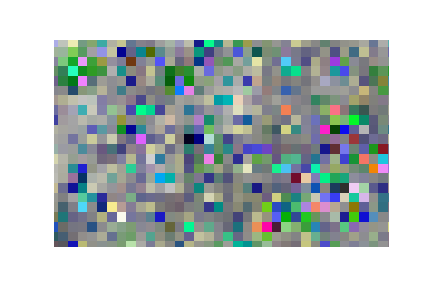

C:\Users\luis.quintanabolano\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
C:\Users\luis.quintanabolano\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars


In [176]:
play(fr2,30)

In [177]:
def separate_colors (fr):
    %matplotlib notebook
    fig2 = plt.figure()
    ax1 = fig2.add_subplot(131)
    ax2 = fig2.add_subplot(132, sharex=ax1, sharey=ax1)
    ax3 = fig2.add_subplot(133, sharex=ax1, sharey=ax1)

    ax1.axis("off")
    ax2.axis("off")
    ax3.axis("off")
    ax1.imshow(fr[:,:,0],cmap = "Reds")
    ax2.imshow(fr[:,:,1],cmap = "Greens")
    ax3.imshow(fr[:,:,2],cmap = "Blues")
    fig2.show()
    fig2.canvas.draw()

<IPython.core.display.Javascript object>


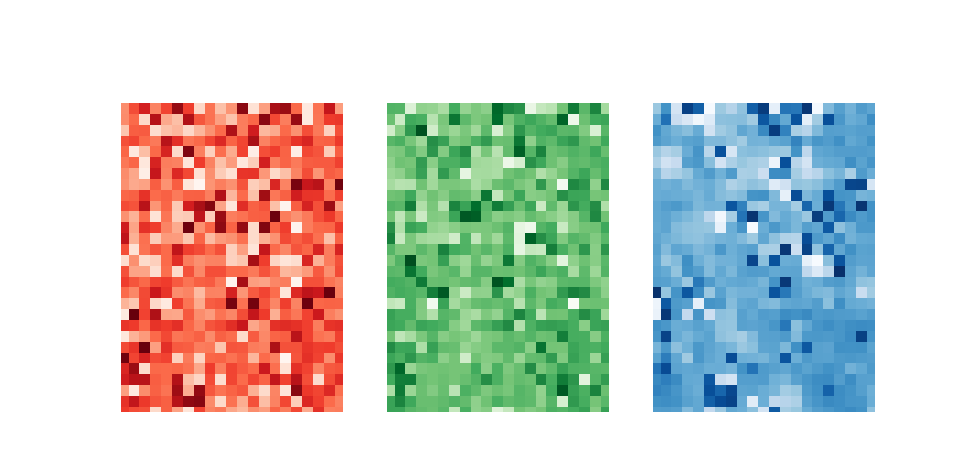

In [178]:
separate_colors(fr2)